In [2]:
import tranformations
import matplotlib.pyplot as plt
import os
from ipywidgets import FloatSlider, IntSlider, Output, VBox, Tab, interactive, Button, Label, SelectionSlider
import textwrap
import utils
import numpy as np

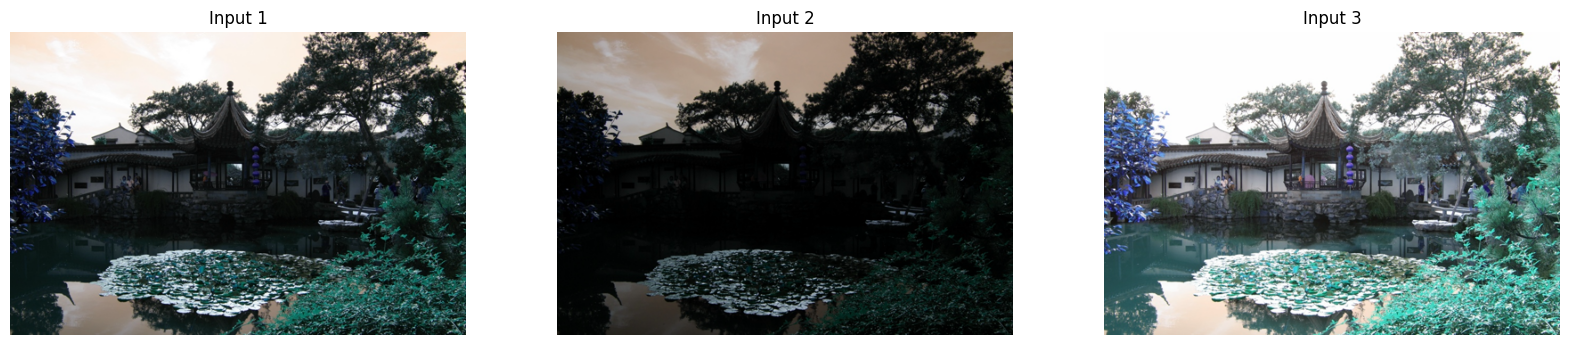

In [3]:
dirname = os.path.abspath('')
folder = os.path.join(dirname, 'MEFDatabase/source image sequences/Chinese_garden_Bartlomiej Okonek/')
images = utils.load_images_from_folder(folder)
images_per_row = 3

num_inputs = len(images)

# Calculate the number of rows needed for inputs and results
input_rows = (num_inputs + images_per_row - 1) // images_per_row

# Create the figure and axes
fig, axes = plt.subplots(input_rows, images_per_row, figsize=(20,20))
axes = axes.flatten()  # Flatten to easily iterate over all axes
FloatSlider(min=1e-7, max=1e-5, step=1e-7, value=1e-6, description='Epsilon:')
# Plot input images
for i, img in enumerate(images):
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(f'Input {i + 1}')
    ax.axis('off')

In [ ]:
def interactive_average_fusion():
    title, fused = tranformations.average_fusion(images)
    plt.figure(figsize=(8,8))
    plt.imshow(fused)
    plt.title(title)
    plt.axis('off')
    plt.show()

def interactive_mertens_fusion():
    title, fused = tranformations.mertens_fusion(images)
    plt.figure(figsize=(8,8))
    plt.imshow(fused)
    plt.title(title)
    plt.axis('off')
    plt.show()

def interactive_exposure_fusion():
    title, fused = tranformations.exposure_fusion(images)
    plt.figure(figsize=(8,8))
    plt.imshow(fused)
    plt.title(title)
    plt.axis('off')
    plt.show()

def interactive_exposure_compensation_fusion():
    title, fused = tranformations.exposure_compensation_fusion(images)
    plt.figure(figsize=(8,8))
    plt.imshow(fused)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Functions with numeric parameters
def interactive_laplacian_pyramid_fusion(levels):
    title, fused = tranformations.laplacian_pyramid_fusion(images, levels=levels)
    plt.figure(figsize=(8,8))
    plt.imshow(fused)
    plt.title(f"{title} (levels: {levels})")
    plt.axis('off')
    plt.show()

def interactive_enhanced_exposure_fusion(sigma, epsilon, kernel_dim):
    title, fused = tranformations.enhanced_exposure_fusion(images, sigma=sigma, epsilon=epsilon, blur_kernel=(kernel_dim,kernel_dim))
    plt.figure(figsize=(8,8))
    plt.imshow(fused)
    plt.title(f"{title} (sigma: {sigma:.2f}, epsilon: {epsilon})")
    plt.axis('off')
    plt.show()

def interactive_domain_transform_fusion(sigmaSpatial, sigmaColor, epsilon):
    title, fused = tranformations.domain_transform_fusion(images, sigmaSpatial=sigmaSpatial, sigmaColor=sigmaColor, epsilon=epsilon, homebrew_dt=False)
    plt.figure(figsize=(8,8))
    plt.imshow(fused)
    plt.title(f"{title} (sigmaSpatial: {sigmaSpatial}, sigmaColor: {sigmaColor}, epsilon: {epsilon})")
    plt.axis('off')
    plt.show()

def interactive_wavelet_fusion(level):
    title, fused = tranformations.wavelet_fusion(images, wavelet='db1', level=level)
    plt.figure(figsize=(8,8))
    plt.imshow(fused)
    plt.title(f"{title} (level: {level})")
    plt.axis('off')
    plt.show()

def interactive_dt_filter(sigmaSpatial, sigmaColor, num_iterations):
    guidance = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB).astype(np.float32)/255.0
    src = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY).astype(np.float32)/255.0
    filtered = dt_filter(guidance, src, sigmaSpatial=sigmaSpatial, sigmaColor=sigmaColor, num_iterations=num_iterations)
    plt.figure(figsize=(8,8))
    plt.imshow(filtered, cmap='gray')
    plt.title(f"dt_filter (sigmaSpatial: {sigmaSpatial}, sigmaColor: {sigmaColor}, iterations: {num_iterations})")
    plt.axis('off')
    plt.show()

# --------------------------
# Create interactive widgets
# --------------------------

epsilon_values = np.round(np.logspace(-7, -5, num=10), decimals=10)

# Ensure the default value is in the list
default_epsilon = 1e-6
if default_epsilon not in epsilon_values:
    epsilon_values = np.append(epsilon_values, default_epsilon)
    epsilon_values = np.sort(epsilon_values)  # Keep sorted order


laplacian_widget = interactive(interactive_laplacian_pyramid_fusion, levels=IntSlider(min=1, max=10, step=1, value=4, description='Levels:'))
enhanced_widget = interactive(interactive_enhanced_exposure_fusion, 
                            sigma=FloatSlider(min=0.1, max=1.0, step=0.05, value=0.2, description='Sigma:'), 
                            epsilon=SelectionSlider(
                                options=[(f"{e:.1e}", e) for e in epsilon_values],  # Display as scientific notation
                                value=default_epsilon,
                                description="Epsilon:"
                            ),
                            kernel_dim = IntSlider(min=1, max=10, step=1, value=3, description="Kernel dimension:"))
domain_widget = interactive(interactive_domain_transform_fusion, 
                            sigmaSpatial=FloatSlider(min=10, max=100, step=5, value=60, description='sigmaSpatial:'), 
                            sigmaColor=FloatSlider(min=0.1, max=1.0, step=0.05, value=0.4, description='sigmaColor:'), 
                            epsilon=SelectionSlider(
                                options=[(f"{e:.1e}", e) for e in epsilon_values],  # Display as scientific notation
                                value=default_epsilon,
                                description="Epsilon:"
                            ))
wavelet_widget = interactive(interactive_wavelet_fusion, level=IntSlider(min=1, max=5, step=1, value=2, description='Level:'))

# For functions without adjustable numeric parameters, use buttons.
avg_button = Button(description="Run Average Fusion")
mertens_button = Button(description="Run Mertens Fusion")
exposure_button = Button(description="Run Exposure Fusion")
exp_comp_button = Button(description="Run Exposure Compensation Fusion")

out_avg = Output()
out_mertens = Output()
out_exposure = Output()
out_exp_comp = Output()

def run_avg(b):
    with out_avg:
        out_avg.clear_output(wait=True)
        interactive_average_fusion()
def run_mertens(b):
    with out_mertens:
        out_mertens.clear_output(wait=True)
        interactive_mertens_fusion()
def run_exposure(b):
    with out_exposure:
        out_exposure.clear_output(wait=True)
        interactive_exposure_fusion()
def run_exp_comp(b):
    with out_exp_comp:
        out_exp_comp.clear_output(wait=True)
        interactive_exposure_compensation_fusion()

avg_button.on_click(run_avg)
mertens_button.on_click(run_mertens)
exposure_button.on_click(run_exposure)
exp_comp_button.on_click(run_exp_comp)

# --------------------------
# Layout the widgets in a Tabbed interface
# --------------------------
tab = Tab(children=[
    VBox([Label("Average Fusion (no parameters):"), avg_button, out_avg]),
    VBox([Label("Mertens Fusion (no parameters):"), mertens_button, out_mertens]),
    VBox([Label("Laplacian Pyramid Fusion:"), laplacian_widget]),
    VBox([Label("Exposure Fusion (no parameters):"), exposure_button, out_exposure]),
    VBox([Label("Exposure Compensation Fusion (no parameters):"), exp_comp_button, out_exp_comp]),
    VBox([Label("Enhanced Exposure Fusion:"), enhanced_widget]),
    VBox([Label("Domain Transform Fusion:"), domain_widget]),
    VBox([Label("Wavelet Fusion:"), wavelet_widget]),
])
tab.set_title(0, "Average")
tab.set_title(1, "Mertens")
tab.set_title(2, "Laplacian")
tab.set_title(3, "Exposure")
tab.set_title(4, "Exp. Comp.")
tab.set_title(5, "Enhanced")
tab.set_title(6, "Domain Trans.")
tab.set_title(7, "Wavelet")

display(tab)

In [ ]:
import cv2

out = Output()

def show_weight_maps(image_index):
    """Function to compute and display weight maps for a given image index."""
    img = images[image_index]
    epsilon = 1e-6

    guidance = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0

    gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    contrast = np.abs(cv2.Laplacian(gray, cv2.CV_32F))

    saturation = np.std(img, axis=2)

    well_exposedness = np.exp(-0.5 * ((img - 0.5) / 0.2) ** 2)
    well_exposedness = np.prod(well_exposedness, axis=2)

    weight = (contrast + epsilon) * (saturation + epsilon) * (well_exposedness + epsilon)

    # Apply Homebrew Domain Transform filter
    smooth_weight_homebrew = tranformations.dt_filter(guidance, weight, sigmaSpatial=60, sigmaColor=0.4, num_iterations=2)

    # Apply OpenCV's dtFilter
    smooth_weight_opencv = cv2.ximgproc.dtFilter(img, weight.astype(np.float32), sigmaSpatial=60, sigmaColor=0.4, mode=1)

    with out:
        out.clear_output(wait=True)
        plt.figure(figsize=(18, 5))

        # Original Weight Map
        plt.subplot(1, 3, 1)
        plt.imshow(weight, cmap='gray')
        plt.title(f"Original Weight Map (Image {image_index})")
        plt.axis('off')

        # Homebrew Domain Transform
        plt.subplot(1, 3, 2)
        plt.imshow(smooth_weight_homebrew, cmap='gray')
        plt.title(f"Smoothed Weight Map (Homebrew DT, Image {image_index})")
        plt.axis('off')

        # OpenCV dtFilter
        plt.subplot(1, 3, 3)
        plt.imshow(smooth_weight_opencv, cmap='gray')
        plt.title(f"Smoothed Weight Map (OpenCV dtFilter, Image {image_index})")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

# Create buttons dynamically
buttons = []
for i in range(len(images)):
    btn = Button(description=f"Show Image {i}")
    btn.on_click(lambda b, idx=i: show_weight_maps(idx))  # Capture correct index
    buttons.append(btn)

# Display buttons and output widget
display(VBox(buttons + [out]))

(np.float64(-0.5), np.float64(511.5), np.float64(339.5), np.float64(-0.5))

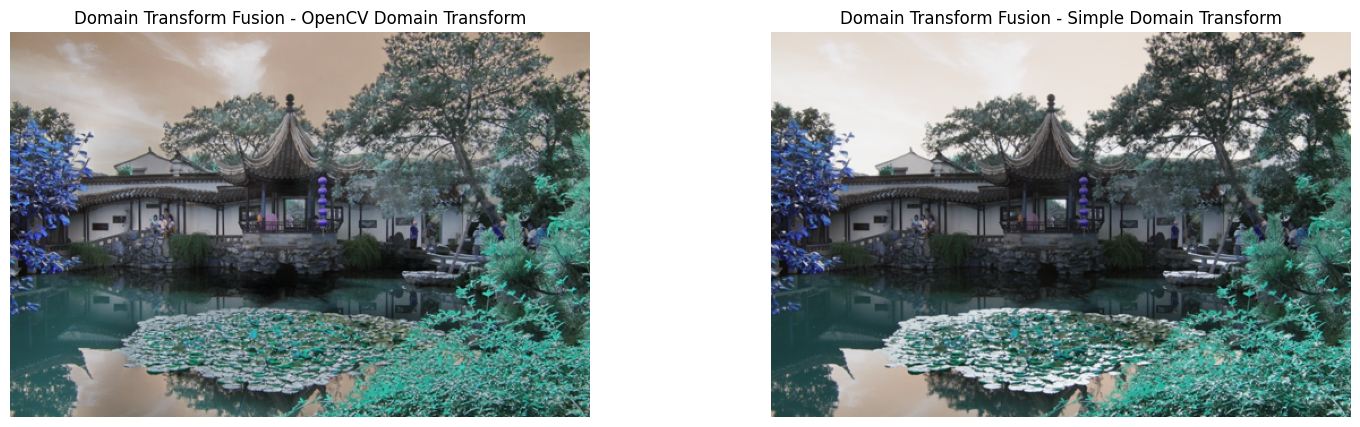

In [6]:
#comparison between homebrew and opencv dt filter
title, fused = tranformations.domain_transform_fusion(images, homebrew_dt=False)
title_hb, fused_hb = tranformations.domain_transform_fusion(images, homebrew_dt=True)

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.imshow(fused)
plt.title(title)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fused_hb)
plt.title(title_hb)
plt.axis('off')